<a href="https://colab.research.google.com/github/LOPAMUDRA-MUKHERJEE/DataSC/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1: Numpy & Pandas Basics

In [11]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/bipulshahi/Dataset/main/Iris.csv')
import matplotlib.pyplot as plt

df.head(5)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Question 2: Pandas Groupby


In [7]:
df.groupby('Species').mean()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.5,5.006,3.418,1.464,0.244
Iris-versicolor,75.5,5.936,2.770,4.260,1.326
Iris-virginica,125.5,6.588,2.974,5.552,2.026


In [8]:
max_petal_length = df.groupby('Species')['PetalLengthCm'].mean().sort_values(ascending=False).index[0]
print(f"Species with the highest mean petal length: {max_petal_length}")

Species with the highest mean petal length: Iris-virginica


Question 3: Univariate & Bivariate Analysis


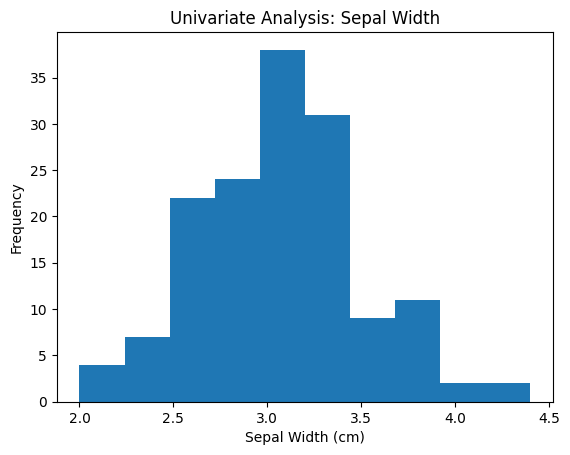

In [9]:
sepal_width = df['SepalWidthCm']
plt.hist(sepal_width)
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.title('Univariate Analysis: Sepal Width')
plt.show()


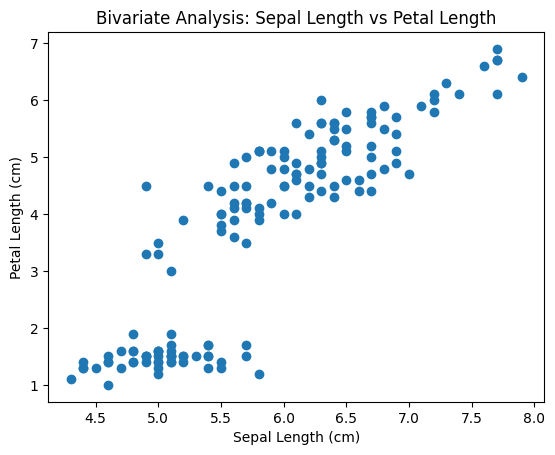

In [10]:
plt.scatter(df['SepalLengthCm'], df['PetalLengthCm'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Bivariate Analysis: Sepal Length vs Petal Length')
plt.show()


Question 4: Data Visualization using Matplotlib


<ipython-input-17-4c2662b94f3b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette='pastel')


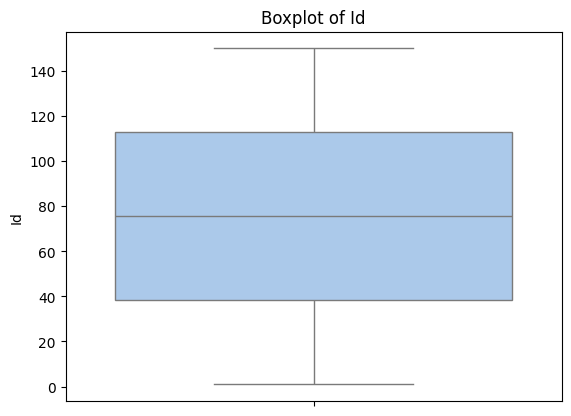

<ipython-input-17-4c2662b94f3b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette='pastel')


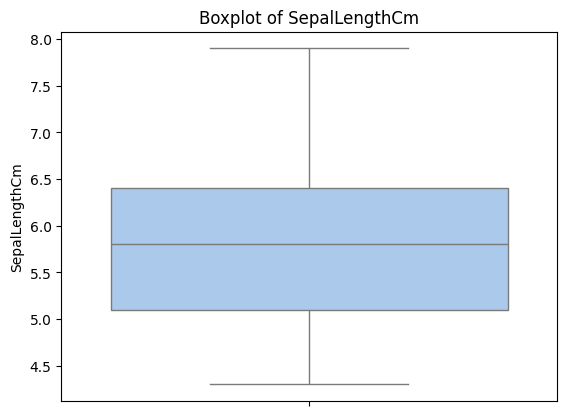

<ipython-input-17-4c2662b94f3b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette='pastel')


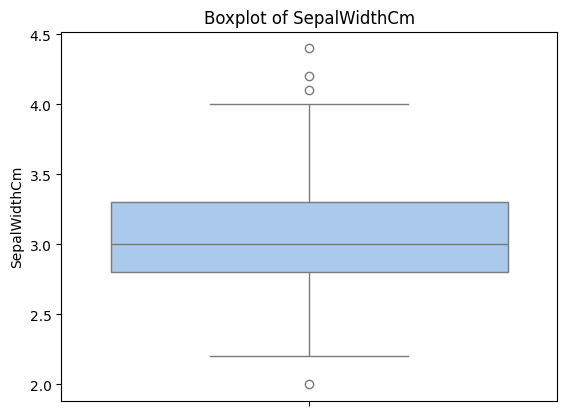

<ipython-input-17-4c2662b94f3b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette='pastel')


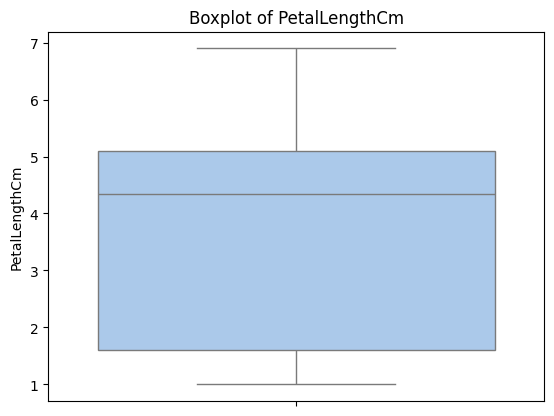

<ipython-input-17-4c2662b94f3b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette='pastel')


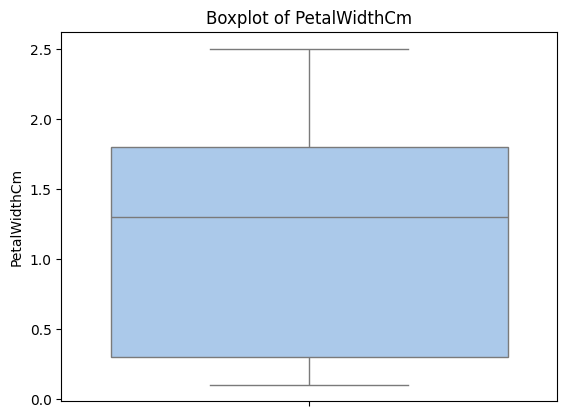

In [17]:
# prompt: Create a box plot for each feature in the dataset to show their distributions.

import matplotlib.pyplot as plt
import seaborn as sns
for col in df.columns:
  if df[col].dtype != 'object':
    sns.boxplot(y=df[col], palette='pastel')
    plt.title(f'Boxplot of {col}')
    plt.show()


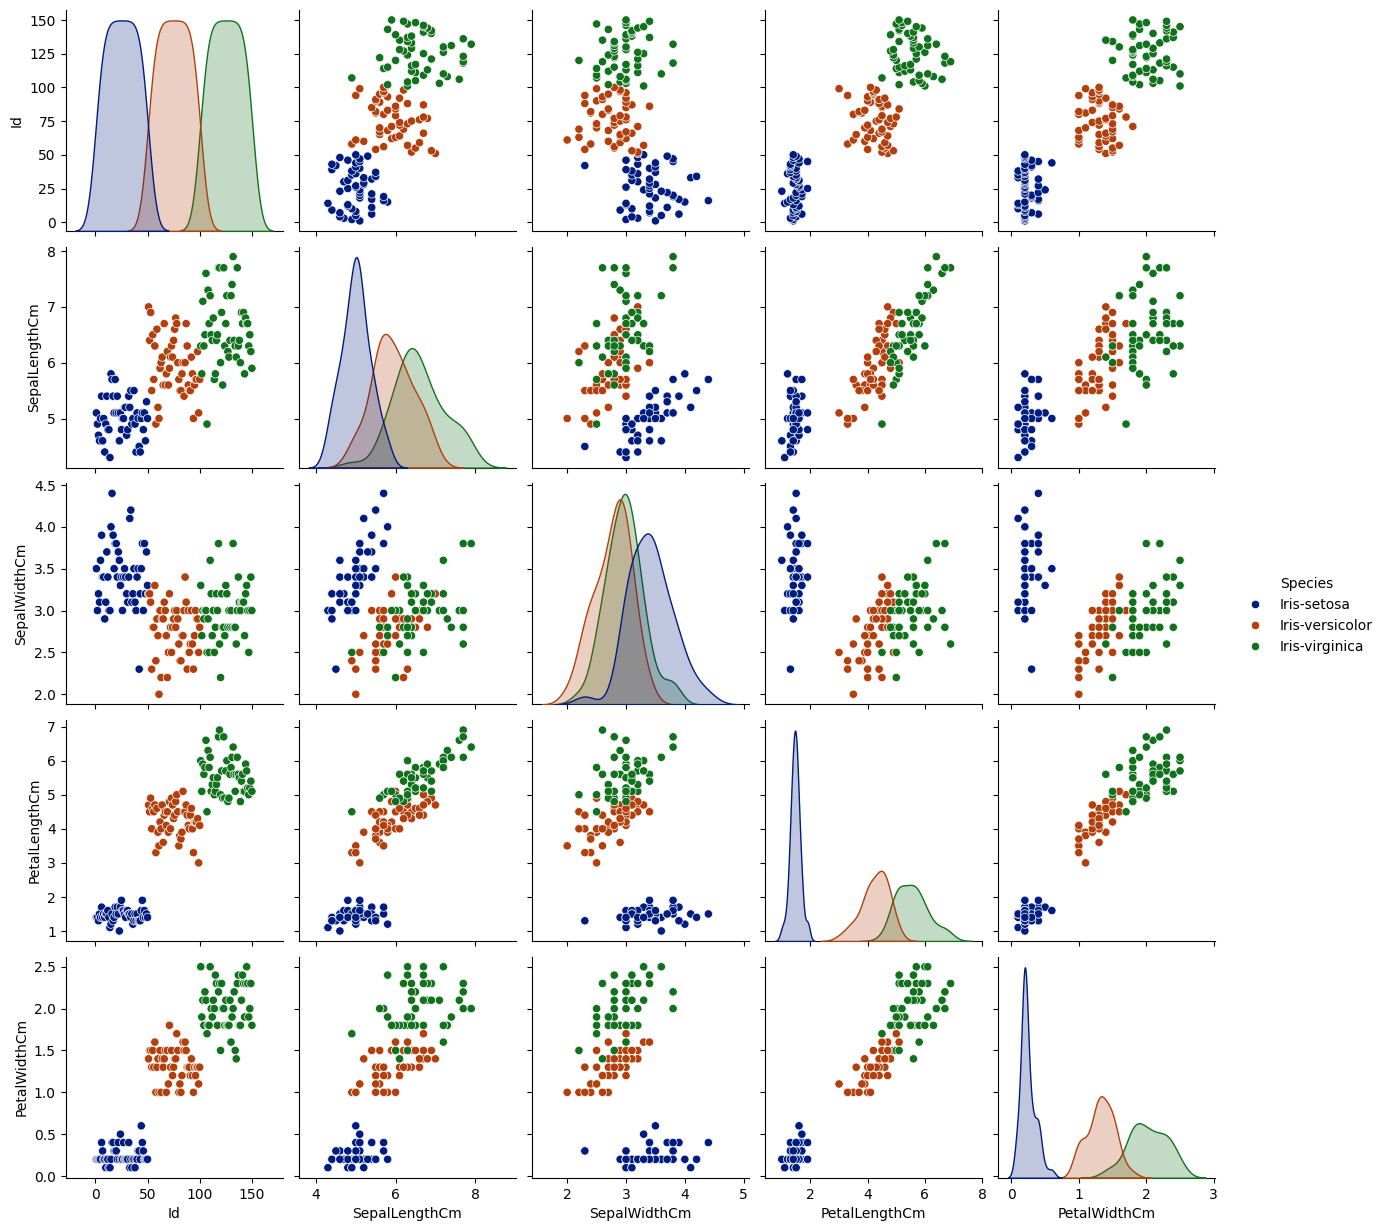

In [22]:
# prompt: Create a pair plot to visualize the relationships between all pairs of features, colored by species.

sns.pairplot(df, hue='Species', palette='dark')
plt.show()


Question 5: Statistics


In [23]:
# prompt: Calculate the mean, median, variance, and standard deviation for 'petal width (cm)'.

petal_width = df['PetalWidthCm']

mean = petal_width.mean()
median = petal_width.median()
variance = petal_width.var()
std_dev = petal_width.std()

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {std_dev}")


Mean: 1.1986666666666668
Median: 1.3
Variance: 0.582414317673378
Standard Deviation: 0.7631607417008411


In [27]:
# prompt: Compute the z-score for each value in the 'petal width (cm)' column and identify any outliers (z-score > 3 or < -3).

import scipy.stats as stats

z_scores = stats.zscore(df['PetalWidthCm'])
print(z_scores)

outliers = df[abs(z_scores) > 3]

if len(outliers) > 0:
  print("Outliers detected:")
  print(outliers)
else:
  print("No outliers detected.")


0     -1.312977
1     -1.312977
2     -1.312977
3     -1.312977
4     -1.312977
         ...   
145    1.447956
146    0.922064
147    1.053537
148    1.447956
149    0.790591
Name: PetalWidthCm, Length: 150, dtype: float64
No outliers detected.


WINE DATASET

Question 1: Classification using KNN, DecisionTreeClassifier, and RandomForestClassifier

In [33]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/winequality-white.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [35]:
# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split

X = df.drop('quality', axis=1)  # Features
y = df['quality']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and test sets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of X_train: (3918, 11)
Shape of X_test: (980, 11)
Shape of y_train: (3918,)
Shape of y_test: (980,)


In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
# prompt: Train and evaluate a K-Nearest Neighbors (KNN) classifier.

from sklearn.neighbors import KNeighborsClassifier

# Define the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier
knn.fit(X_train, y_train)




KNeighborsClassifier()

In [39]:
#Evalauation
print("Training Data Accuracy" , knn.score(X_train, y_train))
print("Test Data Accuracy" , knn.score(X_test, y_test))

Training Data Accuracy 0.6932108218478815
Test Data Accuracy 0.5530612244897959
